In [1]:
from matplotlib import pyplot as plt
from skimage.feature import hog
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import keras
import scipy.io
import numpy as np
import pytesseract
import cv2
import os

Using TensorFlow backend.


In [44]:
def OCR_scan(img_path = '', pre = 'thresh', save_path = '', number_pics = ''):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if pre == 'thresh':
        ret, gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    elif pre =='blur':
        gray = cv2.medianBlur(gray, 3)
    save_into = save_path+number_pics+'.jpg'
    cv2.imwrite(save_into, gray) 

In [45]:
img_list = 'crop_image\\'
pre1 = 'thresh'
pre2 = 'blur'
save_path1 = 'preprocess_thresh\\'
save_path2 = 'preprocess_blur\\'
count = '1'
count_str = 1
for i in os.listdir(img_list):
    img_path = img_list+i
    OCR_scan(img_path = img_path, pre = pre1, save_path = save_path1, number_pics = count)
    OCR_scan(img_path = img_path, pre = pre2, save_path = save_path2, number_pics = count)
    count_str += 1
    count = str(count_str)

In [37]:
filename = 'preprocess_thresh\\'
list_thresh = []
list_blur = []
list_o = []
list_test = []
for i in range(28):
    name = i+1
    thresh = filename + str(name) + '.jpg'
    blur = 'preprocess_blur\\'+ str(name) + '.jpg'
    original = 'crop_image\\'+ str(name) + '.jpg'
    test = 'preprocess_test\\'+ str(name) + '.jpg'
    list_thresh.append(pytesseract.image_to_string(Image.open(thresh)))
    list_blur.append(pytesseract.image_to_string(Image.open(blur)))
    list_o.append(pytesseract.image_to_string(Image.open(original)))
    list_test.append(pytesseract.image_to_string(Image.open(test)))

# print(list)

Result of thresholding is: 63-89
99999


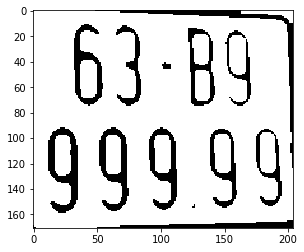

In [64]:
img_path = 'preprocess_blur\\1.jpg'
img_path = 'test_license.jpg'
img_path = 'something.jpg'
# img_path = '.\\training-samples\\detection\\positives\\0_036_000.png'
# img_path = 'test_tesseract1.png'
image = Image.open(img_path)
# image = image.resize((100,100))
image = np.array(image)
# image = image[5:95,5:95]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, test_1 = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
test_2 = cv2.medianBlur(gray, 9)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.dilate(test_1,kernel,iterations = 1)
plt.imshow(erosion,cmap = 'gray')
config = ('-l eng --oem 1 --psm 3')
a = (pytesseract.image_to_string(erosion,config = config))
print('Result of thresholding is: {}'.format(a))

In [20]:
for i in list_thresh:
    print('#{}'.format(i))

#J 59 PA j
664.80
#62 HS
7108
#
#
#1
99.97
#
#ead
043.09
#
#BY 59-41
so7 00
#59-81
385.59
#54-H}
6982
#
#59°51
09841
#81-61
135.56
#60-F1
506.70
#Be "1
0200
#16M
06.
#
#S5-Po i
2840
#
#
#
#
#
#
#136.29
#
#59-(2
316.61


In [21]:
for i in list_blur:
    print('#{}'.format(i))

#
#
#
#
#59897
#B 99°C2
012.08
#ie
043.09
#
#
#
#
#
#39-51
098.41
#81-61
135.56
#60:F1
506.70
#
#1
0

6-H
61

i
#
#Gar) ¢
7840)
#
#
#
#
#
#
#136.29
#70-01
/39 16
#39-(2
316.01


In [23]:
for i in list_o:
    print('#{}'.format(i))

#, 59-P1 '
664.80
#
#
#
#
#
#136.29
#
#59-(7
316.01
#
#
#
#U1]
98.97
#
#78-G)
043.08)
#59-E]
708.50
#
#
#36-HT
4882
#am 59-51
098.41)
#81-61
1135.56
#60-F1
506.70
#63-/
0200
#
#
#55-79
7840)
#
#


In [73]:
img_path = 'crop_image\\1.jpg'
image = cv2.imread(img_path,0)
# plt.imshow(image, cmap = 'gray')
# hist,bins = np.histogram(image.flatten(),256,[0,255]) 
# plt.imshow(hist,cmap = 'gray')
img = cv2.equalizeHist(image)
ret, img = cv2.threshold(img, 180, 255,cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
# ret, gray = cv2.threshold(closing, 180, 255,cv2.THRESH_BINARY)
test = Image.fromarray(closing.astype('uint8'), 'gray')
text = pytesseract.image_to_string(Image.open(closing))
print(text)
plt.imshow(closing, cmap = 'gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: unrecognized image mode

In [43]:
img_list = 'crop_image\\'
# img = cv2.imread(img_path,0)
# ret, gray = cv2.threshold(img, 150, 255,cv2.THRESH_BINARY)
# plt.imshow(gray, cmap = 'gray')
def OCR_test(img_path = '', pre = 'thresh', save_path = '', number_pics = ''):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if pre == 'thresh':
        ret, gray = cv2.threshold(gray, 180, 255,cv2.THRESH_BINARY)
#     elif pre =='blur':
#         gray = cv2.medianBlur(gray, 3)
    save_into = save_path+number_pics+'.jpg'
    cv2.imwrite(save_into, gray) 
count = '1'
count_str = 1
for i in os.listdir(img_list):
    img_path = img_list+i
    OCR_test(img_path = img_path, pre = 'thresh', save_path = 'preprocess_test\\', number_pics = count)
    count_str += 1
    count = str(count_str)

In [44]:
list_test = []
for i in range(28):
    name = i+1
    test = 'preprocess_test\\'+ str(name) + '.jpg'
    list_test.append(pytesseract.image_to_string(Image.open(test)))
for i in list_test:
    print('#{}'.format(i))

#59-P1
661.80
#
#FT,
170.78
#
#59-1
98.97]
#
#
#
#
#59-B1 |
38559
#50H
6882 fi
#
#9-51 |
098.41]
#
#§0-F
506.70)
#63-41]
02004
#
#
#
#
#
#ae “TT
#
#
#
#59-ul
136.29
#1-C1
789.15
#


In [2]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.

It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.


ValueError: `steps_per_epoch=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps_per_epoch` or use the `keras.utils.Sequence` class.

In [35]:
from PIL import Image
from matplotlib import pyplot as plt
img = Image.open('five.jpg')
# print(np.array(img).shape)
image = img.resize((28,28), Image.LANCZOS)
image = np.array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [24]:
a = np.array([[[1,2,3],[1,2,3]],[[1,2,3],[1,2,3]]])
b = np.array([[[1,2,3],[1,2,3]],[[1,2,3],[1,2,3]],[[1,2,3],[1,2,3]]])

print(np.concatenate((a,b),axis=0).shape)

(5, 2, 3)


# Image Preprocessing

In [55]:
# Take hog vetor and set label for all data positive
positive_path = '.\\charTrainset\\'
X_train_positive = np.zeros((1076,672))
label_positive = []
count = 0
for digits in os.listdir(positive_path):
    for pics in os.listdir(positive_path+digits):
        image = cv2.imread(positive_path+digits+'\\'+pics)
        X_train_positive[count], hog_image = hog(image,orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), 
                                        visualise = True,multichannel=True,feature_vector = True)
        label_positive.append(1)
        count+=1
        if count%100==0:
            print('Done {} %'.format((count*100)/1076))
print('Done 100 %')

Done 9.293680297397769 %
Done 18.587360594795538 %
Done 27.881040892193308 %
Done 37.174721189591075 %
Done 46.468401486988846 %
Done 55.762081784386616 %
Done 65.05576208178438 %
Done 74.34944237918215 %
Done 83.64312267657992 %
Done 92.93680297397769 %
Done 100 %


In [56]:
# Take hog vetor and set label for all data negative
negative_path1 = ['.\\training-samples\\detection\\negatives\\','.\\training-samples\\icdar\\negatives\\']
X_train_negative = np.zeros((9300,672))
label_negative = []
count = 0
for path in negative_path1:
    for pics in os.listdir(path):
        img = Image.open(path+pics)
        image = img.resize((12,28))
        image_np = np.array(image)
        X_train_negative[count], hog_image = hog(image_np,orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), 
                                        visualise = True,multichannel=True,feature_vector = True)
        label_negative.append(0)
        count+=1
        if count%100==0:
            print('Done {} %'.format((count*100)/9300))
print('Done 100 %')

Done 1.075268817204301 %
Done 2.150537634408602 %
Done 3.225806451612903 %
Done 4.301075268817204 %
Done 5.376344086021505 %
Done 6.451612903225806 %
Done 7.526881720430108 %
Done 8.602150537634408 %
Done 9.67741935483871 %
Done 10.75268817204301 %
Done 11.827956989247312 %
Done 12.903225806451612 %
Done 13.978494623655914 %
Done 15.053763440860216 %
Done 16.129032258064516 %
Done 17.204301075268816 %
Done 18.27956989247312 %
Done 19.35483870967742 %
Done 20.43010752688172 %
Done 21.50537634408602 %
Done 22.580645161290324 %
Done 23.655913978494624 %
Done 24.731182795698924 %
Done 25.806451612903224 %
Done 26.881720430107528 %
Done 27.956989247311828 %
Done 29.032258064516128 %
Done 30.107526881720432 %
Done 31.182795698924732 %
Done 32.25806451612903 %
Done 33.333333333333336 %
Done 34.40860215053763 %
Done 35.483870967741936 %
Done 36.55913978494624 %
Done 37.634408602150536 %
Done 38.70967741935484 %
Done 39.784946236559136 %
Done 40.86021505376344 %
Done 41.935483870967744 %
Done 4

In [99]:
# combine together
X_train = np.concatenate((X_train_positive,X_train_negative), axis = 0)
y_train = label_positive + label_negative

In [58]:
# Take hog vetor and set label for all test data negative
test_path = '.\\test_data\\negative\\'
X_test_negative = np.zeros((113,672))
label_test_negative = []
count = 0
for pics in os.listdir(test_path):
    img = Image.open(test_path+pics)
    image = img.resize((12,28))
    image_np = np.array(image)
    X_test_negative[count], hog_image = hog(image_np,orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), 
                                    visualise = True,multichannel=True,feature_vector = True)
    label_test_negative.append(0)
    count+=1
    if count%100==0:
        print('Done {} %'.format((count*100)/113))
print('Done 100 %')

Done 88.49557522123894 %
Done 100 %


In [59]:
# Take hog vetor and set label for all test data positive
test_path = 'C:\\Users\\ADMINS\\Desktop\\train_32x32.mat'
dict_mat = scipy.io.loadmat(test_path)

In [65]:
all_pics = dict_mat['X']
shape = all_pics.shape[3]
X_test_positive = np.zeros((100,672))
label_test_positive = []
for count in range(100):
    img = all_pics[:,:,:,count]
    img = Image.fromarray(img)
    image = img.resize((12,28))
    image_np = np.array(image)
    X_test_positive[count], hog_image = hog(image_np,orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), 
                                    visualise = True,multichannel=True,feature_vector = True)
    label_test_positive.append(1)
print('Done')

Done


In [100]:
# combine together and then save to pickle file
X_test = np.concatenate((X_test_positive,X_test_negative), axis = 0)
y_test = label_test_positive + label_test_negative

In [101]:
#save all data of hog vector into mat file
data_dict = {'X_train':X_train,'y_train':y_train,'X_test':X_test,'y_test':y_test}
scipy.io.savemat('dataTraining',data_dict)

# Training window

In [3]:
#load data from mat file
data_path = '.\\dataTraining.mat'
data = scipy.io.loadmat(data_path)
X_train = data['X_train']
y_train = data['y_train']
X_test  = data['X_test']
y_test  = data['y_test']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(type(y_train))

(10376, 672) (1, 10376) (213, 672) (1, 213)
<class 'numpy.ndarray'>


In [102]:
# Training window for recognize digits in license plate
batch_size = 1860
num_classes = 2
epochs = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
print(y_train.shape)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation = 'relu'))
model.compile(loss='hinge',
              optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
#           validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(10376, 2)
Epoch 1/10
10376/10376 [==============================] - 0s 39us/step - loss: 0.6985 - acc: 0.8871
Epoch 2/10
10376/10376 [==============================] - 0s 6us/step - loss: 0.5072 - acc: 0.8963
Epoch 3/10
10376/10376 [==============================] - 0s 5us/step - loss: 0.5006 - acc: 0.8963
Epoch 4/10
10376/10376 [==============================] - 0s 6us/step - loss: 0.5006 - acc: 0.8963
Epoch 5/10
10376/10376 [==============================] - 0s 5us/step - loss: 0.5005 - acc: 0.8963
Epoch 6/10
10376/10376 [==============================] - 0s 5us/step - loss: 0.5005 - acc: 0.8963
Epoch 7/10
10376/10376 [==============================] - 0s 5us/step - loss: 0.5005 - acc: 0.8963
Epoch 8/10
10376/10376 [==============================] - 0s 5us/step - loss: 0.5005 - acc: 0.8963
Epoch 9/10
10376/10376 [==============================] - 0s 6us/step - loss: 0.5004 - acc: 0.8963
Epoch 10/10
10376/10376 [==============================] - 0s 5us/step - loss: 0.5004 - acc: 0.89

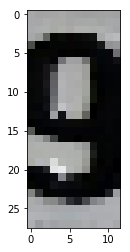

In [112]:
import cv2 
img = Image.open('test_license.jpg')
image = img.resize((120,50))
image = np.array(image)
a = (image[0:28,18:30])
b, hog_image = hog(image_np,orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), 
                                    visualise = True,multichannel=True,feature_vector = True) 
b = np.array(b,ndmin=2)
plt.imshow(a)

In [4]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

ImportError: DLL load failed: The specified module could not be found.

In [4]:
# Why I use pytorch? Because it is much more easier to debug if we compare with tensorflow (Good job M.Z!)
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(672, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    # Look again about data, find more about torch data
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        # torch.optim as optim on above
        optimizer.zero_grad()
        # putdata into model
        output = model(data)
        # loss function of course
        loss = F.nll_loss(output, target)
        # and we take backprop from loss function (more clearly than tensorflow ... or keras)
        loss.backward()
        # update parameters
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        # should better use entropy loss, keyword : torch.nn.CrossEntropyLoss

net = Net()    
params = list(net.parameters())

ImportError: DLL load failed: The specified module could not be found.